# Multivariate Linear Regression

   - ### Exercise
   
## Get Data

In [2]:
import numpy as np
import matplotlib as cm
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'Profit in $10,000s')

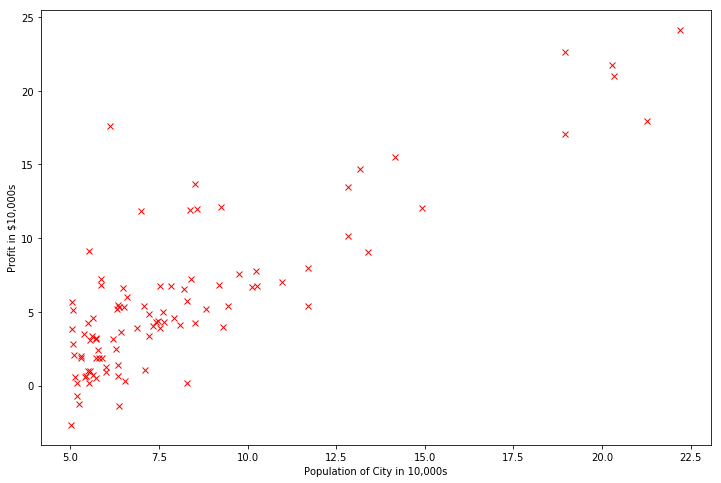

In [4]:
data = np.loadtxt('./ex1/ex1data1.txt', delimiter=',')

X = np.array(data[ :, :-1], dtype=np.float32)   # [None, m]
Y = np.array(data[ :, -1], dtype=np.float32).reshape((-1, 1))  #[None, 1]

m = len(Y)

plt.figure(figsize=(12, 8))
#  lw : size
plt.plot(X, Y, 'rx', lw=3)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')


## Gradient Descent

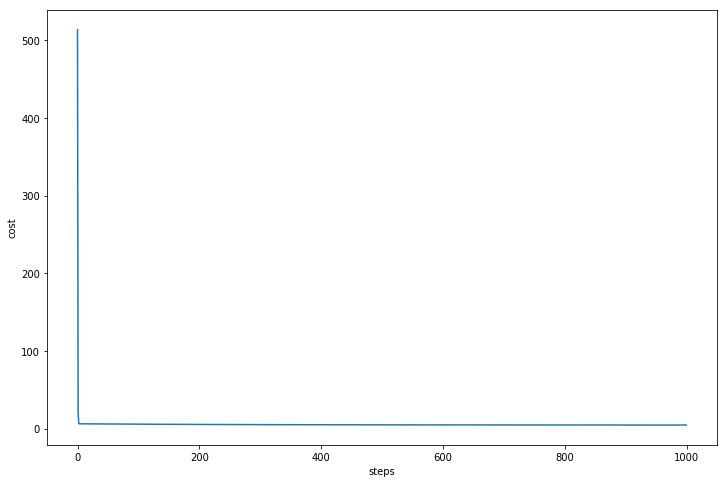

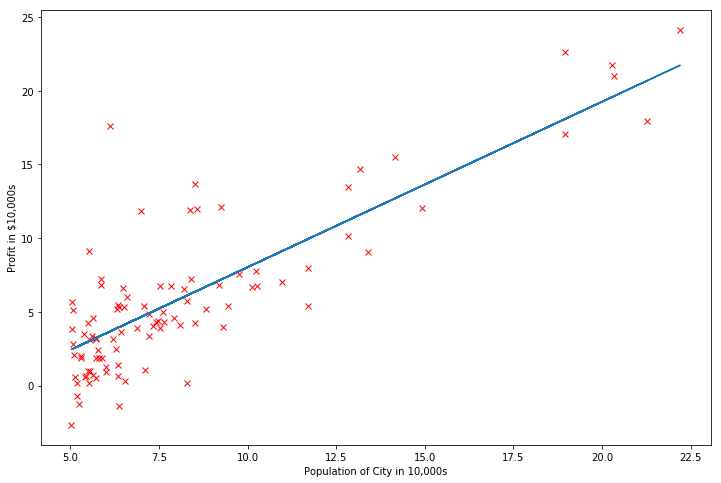

In [5]:

def hypothesis(W, b):
    return np.add(np.dot(X, W), b)

def costFunction(W, b):
    cost = np.dot(1/(2*m), np.sum(np.square(np.subtract(hypothesis(W, b), Y))))
    return cost

def updateTheta(W, b, learning_rate):
    W_gradient = learning_rate * 1/m * np.dot(np.subtract(hypothesis(W, b), Y).T, X)
    b_gradient = learning_rate * 1/m * np.sum(np.subtract(hypothesis(W, b), Y))
    # b :  Theta0   W : Theta1~n
    W = np.subtract(W, W_gradient.T)
    b = np.subtract(b, b_gradient)
    return W, b

def GradientDescentAlgorithm(W, b, learning_rate):
    cost = costFunction(W, b)
    W, b = updateTheta(W, b, learning_rate)
    return W, b, cost

def showCostFunction(X, Y):
    plt.figure(figsize=(12, 8))
    #  lw : size
    plt.plot(X, Y)
    plt.xlabel('steps')
    plt.ylabel('cost')

def showLinearRegression(X, Y, hx):
    plt.figure(figsize=(12, 8))
    #  lw : size
    plt.plot(X, Y, 'rx', lw=3)
    plt.plot(X, hx)
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')


def main():
    learning_rate = 1e-2
    steps = 1000
    
    W = np.random.normal(0, 2, (1, 1))
    b = np.zeros((1))
    #b = np.random.normal(0, 2, (1))
    #W = np.zeros((1, 1))
    #b = 0

    plt_step = np.empty(steps)
    plt_cost = np.empty(steps)

    for step in range(steps):        
        W, b, cost = GradientDescentAlgorithm(W, b, learning_rate)

        plt_step[step] = step
        plt_cost[step] = cost
        
    showCostFunction(plt_step, plt_cost)
    showLinearRegression(X, Y, hypothesis(W, b))
    
main()
    


## Linear regression with multiple variables

### Feature Scaling

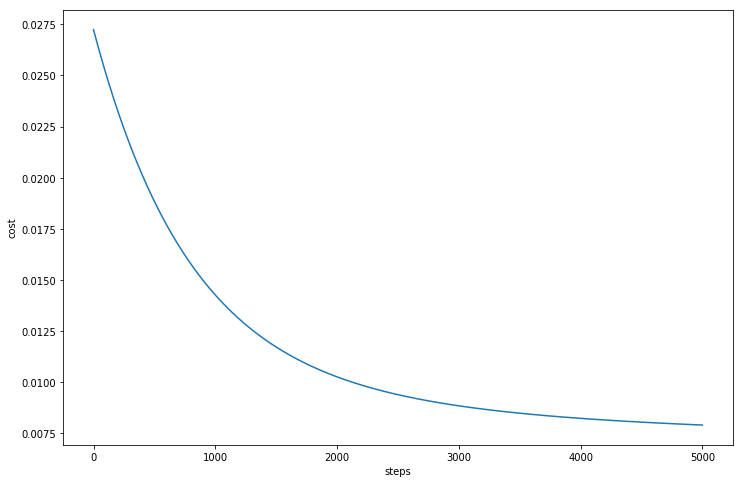

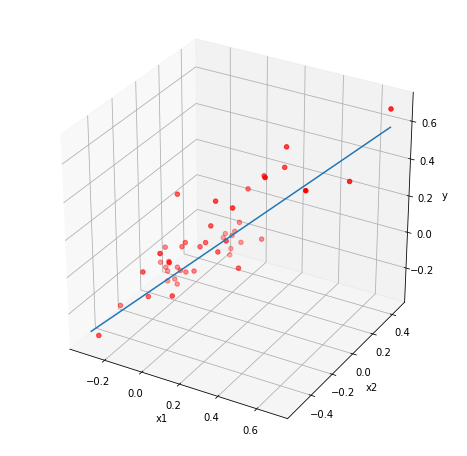

In [5]:
from mpl_toolkits.mplot3d import Axes3D

def show3dLinearRegression(X, Y, Z, w, b):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    x1 = np.linspace(np.min(X), np.max(X), 100)
    x2 = np.linspace(np.min(Y), np.max(Y), 100)
    
    line = w[0][0]*x1 + w[1][0]*x2 + b[0][0]
    ax.scatter(X, Y, Z, c='r', marker='o')
    ax.plot(x1,x2, line)
    
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

def show3dPlot(X, Y, Z):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X, Y, Z, c='r', marker='o')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

data = np.loadtxt('./ex1/ex1data2.txt', delimiter=',')

X = np.array(data[:, :-1])
Y = np.array(data[:, -1]).reshape((-1, 1))

m = len(X)
n = len(X[0])

avgX = X.sum(axis=0) / m
avgY = Y.sum(axis=0) / m

maxIdx = X.argmax(axis=0)
minIdx = X.argmin(axis=0)

#  feature scaling
for i in range(n):
    S = X[maxIdx[i]][i] - X[minIdx[i]][i]
    X[:, i:i+1] = np.divide(np.subtract(X[:, i:i+1], avgX[i]), S)

Y = np.divide(np.subtract(Y, avgY), Y[Y.argmax()] - Y[Y.argmin()])

'''
for i in range(n):
    S = X[maxIdx[i]][i] - X[minIdx[i]][i]
    for j in range(m):
        X[j][i] = (X[j][i] - avgX[i]) / S
'''    
#show3dPlot(X[:,0], X[:,1], Y)

def main2():
    learning_rate = 1e-2
    steps = 5000
    
    W = np.zeros((2, 1))
    b = np.zeros((1))

    plt_step = np.empty(steps)
    plt_cost = np.empty(steps)

    for step in range(steps):        
        W, b, cost = GradientDescentAlgorithm(W, b, learning_rate=learning_rate)

        plt_step[step] = step
        plt_cost[step] = cost
        
    #print(hypothesis(W, b))
    showCostFunction(plt_step, plt_cost)
    show3dLinearRegression(X[:,0].reshape((-1,1)), X[:,1].reshape((-1,1)), Y, W, b.reshape((-1, 1)))
    
main2()


## Normal Equation
   - $\theta = (X^TX)^{-1}X^TY$
   - #### E.g.
   
| x<sub>0</sub> | x<sub>1</sub> | x<sub>2</sub> | x<sub>3</sub> | x<sub>4</sub> | y  |
| :---: | :---: | :---: | :---: | :---: | :--: |
|   1   | 2104  |   5   |   1   |  45   | 460  |
|   1   | 1416  |   3   |   2   |  40   | 232  |
|   1   | 1534  |   3   |   2   |  30   | 315  |
|   1   |  852  |   2   |   1   |  36   | 178  |

Normal Equation

[[-410.18017578]
 [   0.67010689]
 [-113.0390625 ]
 [ -62.95556641]
 [  -7.37902832]]
--------------------------------

[[ 0.20409257]
 [ 0.00235698]
 [-0.00683729]
 [-0.04334996]]


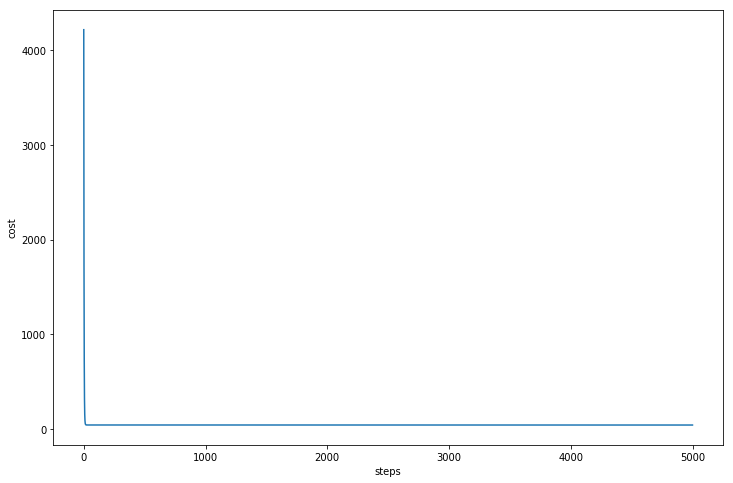

In [6]:
data = np.array([[1, 2104, 5, 1, 45, 460],
                 [1, 1416, 3, 2, 40, 232], 
                 [1, 1534, 3, 2, 30, 315], 
                 [1, 852, 2, 1, 36, 178]])

X = np.array(data[:, :-1])
Y = np.array(data[:, -1]).reshape((-1, 1))

theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)

print("Normal Equation\n")
print(theta)
print("--------------------------------\n")

X = X[:, 1:]

def main3():

    learning_rate = 1e-6
    steps = 5000
    W = np.zeros((4, 1))
    b = np.zeros((4, 1))

    plt_step = np.empty(steps)
    plt_cost = np.empty(steps)

    for step in range(steps):        
        W, b, cost = GradientDescentAlgorithm(W, b, learning_rate=learning_rate)
        
        plt_step[step] = step
        plt_cost[step] = cost
        
    print(W)
    showCostFunction(plt_step, plt_cost)
    
main3()
